### linear regression everywhere, from the foundation of the model portfolio theory to the nowadays popular Fama-French asset pricing model

In [27]:
from polygon import RESTClient
import requests
import pandas as pd
import numpy as np

client = RESTClient(api_key="ocunxnOqC0pnltRqT3VkOiKeCmPE49L7")

# Specify tickers and date range
tickers = ["AMZN", "SPY"]
start_date = "2015-10-22"
end_date = "2024-01-07"
api_key = "ocunxnOqC0pnltRqT3VkOiKeCmPE49L7"

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Fetch data for each ticker
for ticker in tickers:
    # Create the URL for the current ticker
    url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&limit=5000&apiKey={api_key}"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        results = data["results"]
        
        # Create a DataFrame for the current ticker
        df = pd.DataFrame(results)
        df['t'] = pd.to_datetime(df['t'], unit='ms')
        df.index = df['t']


        # Add the DataFrame for the current ticker to the combined DataFrame
        combined_df = pd.concat([combined_df, np.log(df['c']).diff().dropna()], axis=1, join='outer', ignore_index=False)


# Display the combined DataFrame
combined_df






,c,c
2015-10-23 04:00:00,0.060417,0.010902
2015-10-26 04:00:00,0.015866,-0.002461
2015-10-27 04:00:00,0.003936,-0.001934
2015-10-28 04:00:00,0.009918,0.011310
2015-10-29 04:00:00,0.015197,-0.000574
...,...,...
2023-12-29 05:00:00,-0.009433,-0.002899
2024-01-02 05:00:00,-0.013317,-0.005612
2024-01-03 05:00:00,-0.009786,-0.008200
2024-01-04 05:00:00,-0.026619,-0.003226


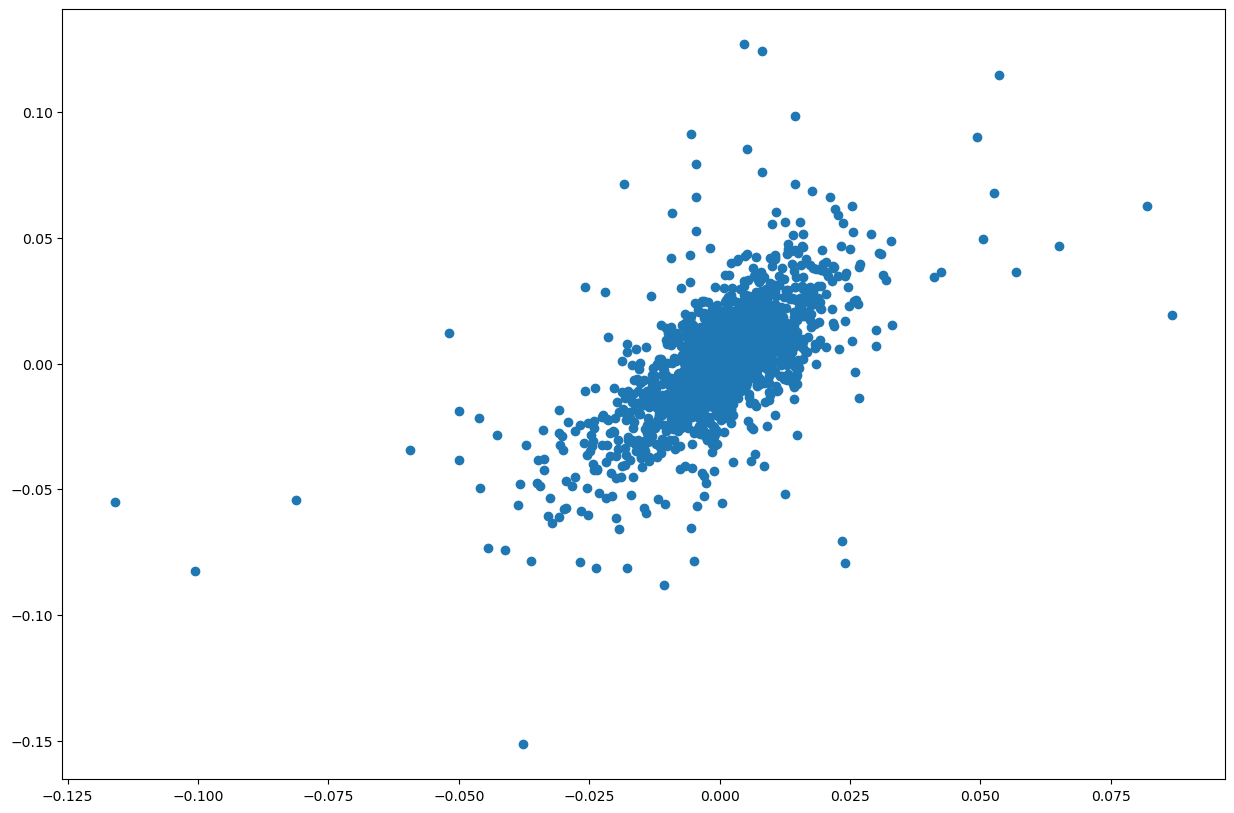

In [28]:
import matplotlib.pyplot as plt

df= combined_df
df.columns = tickers

plt.figure(figsize = (15,10))
plt.scatter(df.SPY,df.AMZN)
plt.show()

#### In order to find the best straight line, it's natural to think that the vertical distances between the points of the data set and the fitted line should be minimized. Those vertical distances are called residual. Our objective is to make the sum of squared residuals as small as possible. This method is called ordinary least square, or OLS method.

In [29]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'AMZN~SPY',data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1408.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.72e-235
Time:                        23:38:45   Log-Likelihood:                 5601.3
No. Observations:                2064   AIC:                        -1.120e+04
Df Residuals:                    2062   BIC:                        -1.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      0.960      0.3

pamameters: Intercept    0.000339
SPY          1.139925
dtype: float64
residual: 2023-12-29 05:00:00   -0.006467
2024-01-02 05:00:00   -0.007259
2024-01-03 05:00:00   -0.000777
2024-01-04 05:00:00   -0.023281
2024-01-05 05:00:00    0.002724
dtype: float64
fitted values: [ 0.01276663 -0.00246595 -0.00186578 ... -0.00900856 -0.00333859
  0.00189931]


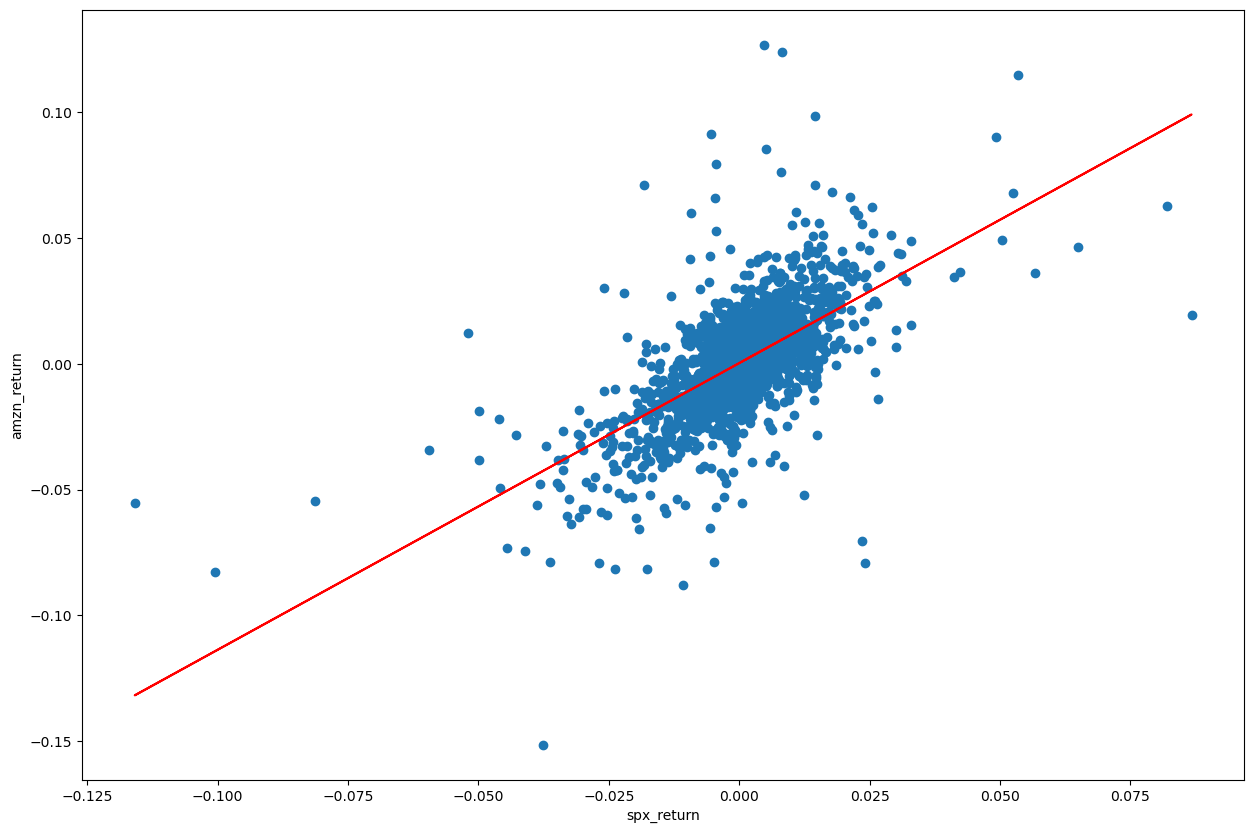

In [30]:
print(f'pamameters: {model.params}')
print(f'residual: {model.resid.tail()}')
print(f'fitted values: {model.predict()}')

plt.figure(figsize = (15,10))
plt.scatter(df.SPY,df.AMZN)
plt.xlabel('spx_return')
plt.ylabel('amzn_return')
plt.plot(df.SPY,model.predict(),color = 'red')
plt.show()

# Student's t-distribution'

### In other words, we have 99.999 confidence to claim that the slope is not 0, and there exists linear relation between X and Y

### However, regarding the intercept, the p-value is 0.923, which means we have only 7.7% confidence level that the value of intercept is not 0

### At 95% confidence level, we can claim that the true value of the parameter is within this range.

# Model Significance

### SSE: Sum of Squared Errors, or SSE, is used to measure the difference between the fitted value and the actual value.

### SS:If you are familiar with variance, we can see that SS divided by the number of sample n is the sample variance.

# Multiple Linear Regression

In [31]:
from polygon import RESTClient
import requests
import pandas as pd

client = RESTClient(api_key="ocunxnOqC0pnltRqT3VkOiKeCmPE49L7")

# Specify tickers and date range
tickers = ["SPY", "AAPL", "AMZN", "EBAY", "WMT"]
start_date = "2013-10-22"
end_date = "2024-01-07"
api_key = "ocunxnOqC0pnltRqT3VkOiKeCmPE49L7"

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Fetch data for each ticker
for ticker in tickers:
    # Create the URL for the current ticker
    url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&limit=5000&apiKey={api_key}"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        results = data["results"]
        
        # Create a DataFrame for the current ticker
        df = pd.DataFrame(results)
        df['t'] = pd.to_datetime(df['t'], unit='ms')
        df.index = df['t']


        # Add the DataFrame for the current ticker to the combined DataFrame
        combined_df = pd.concat([combined_df, np.log(df['c']).diff().dropna()], axis=1, join='outer', ignore_index=False)


import matplotlib.pyplot as plt

df= combined_df
df.columns = tickers
# Display the combined DataFrame
df_total = df




In [32]:
import statsmodels.formula.api as sm
simple = sm.ols(formula = 'AMZN ~ SPY', data = df).fit()

print(simple.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     1544.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          8.54e-265
Time:                        23:38:48   Log-Likelihood:                 6906.3
No. Observations:                2568   AIC:                        -1.381e+04
Df Residuals:                    2566   BIC:                        -1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.241      0.2

In [33]:
model = sm.ols(formula = 'AMZN ~ SPY + AAPL + EBAY + WMT', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     416.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.30e-276
Time:                        23:38:48   Log-Likelihood:                 6944.2
No. Observations:                2568   AIC:                        -1.388e+04
Df Residuals:                    2563   BIC:                        -1.385e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      1.028      0.3

# Fama-French 5-factor model

In [84]:
import pandas as pd
import statsmodels.formula.api as sm
import yfinance as yf
import numpy as np

# Download Fama-French data from the provided URL
fama_url = 'https://raw.githubusercontent.com/QuantConnect/Tutorials/master/Data/F-F_Research_Data_5_Factors_2x3.CSV'
# Skip the explanatory header line and the last non-numeric line
fama_table = pd.read_csv(fama_url, skiprows=3, index_col=0, parse_dates=True, skipfooter=1, engine='python')

# Clean up the first column by excluding rows with non-numeric or invalid entries
fama_table = fama_table[pd.to_numeric(fama_table.index.astype(str).str[:6], errors='coerce').notnull()]

# Extract the year and month from the first column (considering the first 6 characters) and make it the index
fama_table['Date'] = pd.to_datetime(fama_table.index.astype(str).str[:6], format='%Y%m', errors='coerce')
fama_table = fama_table.dropna().set_index('Date')

# Rename the 'Mkt-RF' column to 'Mkt'
fama_table.rename(columns={'Mkt-RF': 'Mkt'}, inplace=True)


# Use only the data for the year 2016
fama = fama_table['2016-01-01':"2016-12-31"]

# Download Amazon stock data using yfinance
amzn = yf.download("AMZN", start="2016-01-01", end="2016-12-31")

# Use adjusted closing prices for Amazon stock
amzn_log = pd.DataFrame({'AMZN': amzn['Adj Close'].apply(lambda x: np.log(x))})

print(fama)

# Concatenate Fama-French data and Amazon stock data
fama_df = pd.concat([fama, amzn_log['AMZN']], axis=1, join='inner')


print(amzn_log)

print(fama_df)




[*********************100%%**********************]  1 of 1 completed
                 Mkt       SMB       HML       RMW       CMA        RF
Date                                                                  
2016-01-01     -5.77     -3.42      2.08      2.60      3.04      0.01
2016-02-01     -0.07      0.95     -0.49      3.27      2.06      0.02
2016-03-01      6.96      1.10      1.15      0.82     -0.06      0.02
2016-04-01      0.92      1.18      3.26     -2.88      1.97      0.01
2016-05-01      1.78     -0.72     -1.82     -1.01     -2.54      0.01
2016-06-01     -0.05      0.49     -1.46      1.19      1.96      0.02
2016-07-01      3.95      2.64     -1.09      1.32     -1.24      0.02
2016-08-01      0.50      1.73      3.37     -1.31     -0.35      0.02
2016-09-01      0.25      1.76     -1.47     -2.31     -0.06      0.02
2016-10-01     -2.02     -4.04      4.14      1.19      0.21      0.02
2016-11-01      4.86      6.80      8.32     -0.06      3.78      0.01
2016-12-

/var/folders/_y/0xw7_0ss0s3f4kfhj9xl96zw0000gn/T/ipykernel_88231/4033135462.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fama_table = pd.read_csv(fama_url, skiprows=3, index_col=0, parse_dates=True, skipfooter=1, engine='python')


In [85]:
# Perform Fama-French regression
fama_model = sm.ols(formula='AMZN ~ Mkt + SMB + HML + RMW + CMA', data=fama_df).fit()

# Print regression summary
print(fama_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 09 Jan 2024   Prob (F-statistic):                nan
Time:                        16:29:50   Log-Likelihood:                 290.34
No. Observations:                   9   AIC:                            -562.7
Df Residuals:                       0   BIC:                            -560.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3404        inf     

/Users/yunbo/anaconda3/envs/quant/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/yunbo/anaconda3/envs/quant/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/yunbo/anaconda3/envs/quant/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/yunbo/anaconda3/envs/quant/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
